In [1]:
import pandas as pd

# importando e visualizando base de dados
notas = pd.read_csv("ratings.csv", sep=',')
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [2]:
# verificando dimensões da base de dados
notas.shape

(100836, 4)

In [3]:
# modificando nomes das colunas
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [5]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

In [6]:
notas['nota'].value_counts()

nota
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

In [7]:
notas['nota'].mean()

3.501556983616962

O histograma também é conhecido como "distribuição de frequências", e é representado em um gráfico de colunas ou de barras a partir de um conjunto de dados previamente tabulado e dividido em classes (uniformes ou não uniformes).

<AxesSubplot: ylabel='Frequency'>

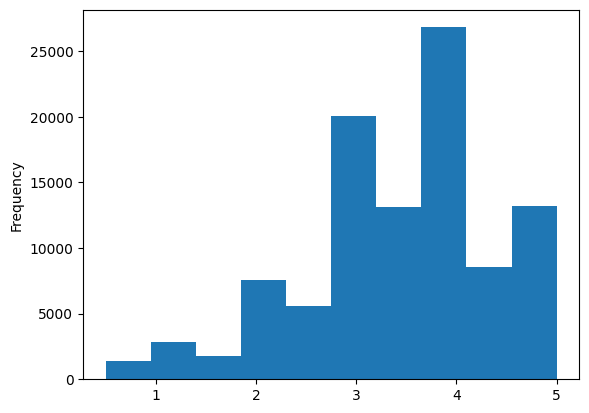

In [8]:
# notas.nota.hist()
notas.nota.plot(kind='hist')

In [9]:
notas['nota'].mean(), notas['nota'].median()

(3.501556983616962, 3.5)

In [10]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

In [11]:
import seaborn as sns

Já o boxplot, também conhecido como "diagrama de caixa", é um método alternativo para o histograma. Uma de suas particularidades é mostrar a faixa em que está concentrada a mediana dos valores.

<AxesSubplot: >

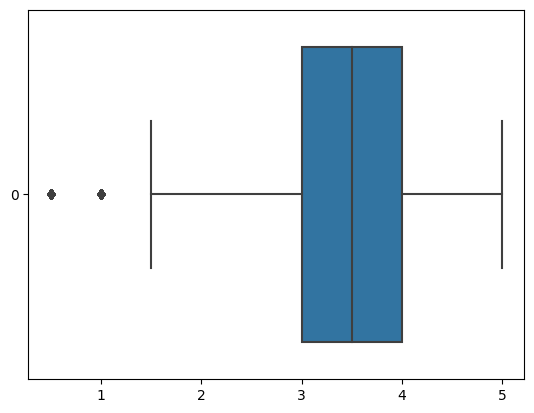

In [12]:
sns.boxplot(notas.nota, orient="h")

Análise exploratória de dados: 

    é uma abordagem de análise de conjuntos de dados para resumir suas principais características, geralmente usando gráficos estatísticos e outros métodos de visualização de dados

In [13]:
filmes = pd.read_csv("./movies.csv",sep=',')
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Agora se quer buscar as notas de uns filmes. Só que as notas estão num banco de dados e os filmes estão em outro, vinculados pelo id do filme

In [14]:
filmes.columns = ['filmeId', 'titulo', 'generos']
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [15]:
# verificar qual a nota média de todos os filmes

## Fazer primeiro para um filme
filtro = notas.filmeId == 1
notas[filtro].nota.mean()

## Criar iteração para todos os filmes
medias_por_filme = notas.groupby("filmeId").mean().nota
medias_por_filme

filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

<AxesSubplot: >

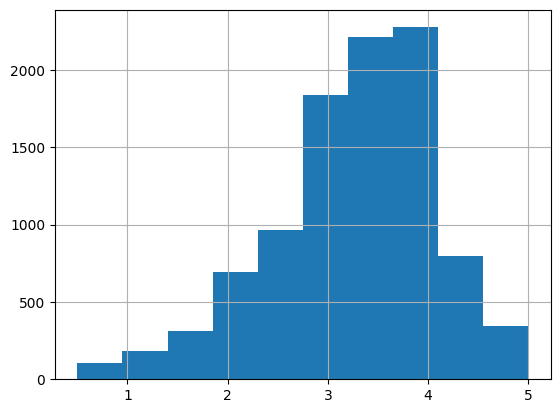

In [16]:
medias_por_filme.hist()

<AxesSubplot: >

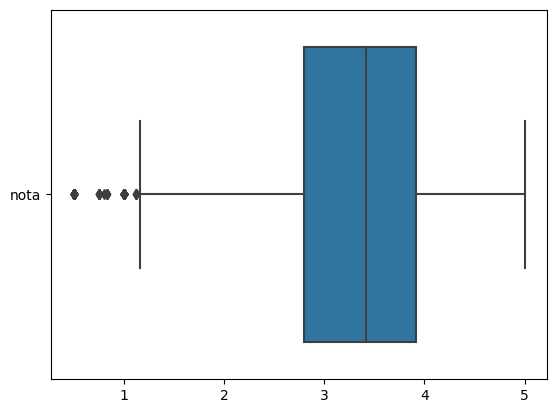

In [17]:
medias_por_filme = pd.DataFrame(medias_por_filme)
sns.boxplot(medias_por_filme, orient="h")

In [18]:
medias_por_filme.describe()

,nota
count,9724.000000
mean,3.262448
std,0.869874
min,0.500000
25%,2.800000
50%,3.416667
75%,3.911765
max,5.000000


C:\Users\joaoa\AppData\Local\Temp\ipykernel_10392\2684882360.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(medias_por_filme, bins = 10)


<AxesSubplot: ylabel='Density'>

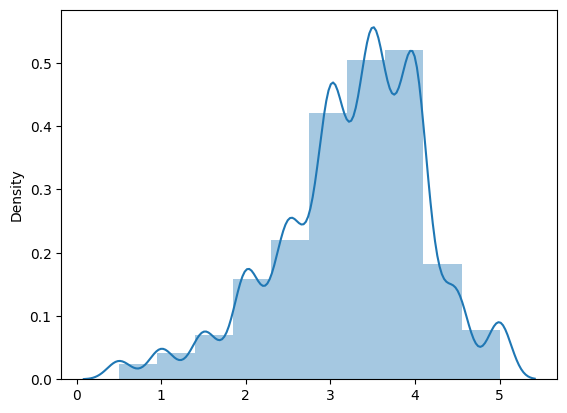

In [19]:
# também é possível fazer histograma com seaborn
# o bins determinar a quantidade de barras que irá utilizar
sns.distplot(medias_por_filme, bins = 10)

<Figure size 1200x600 with 0 Axes>

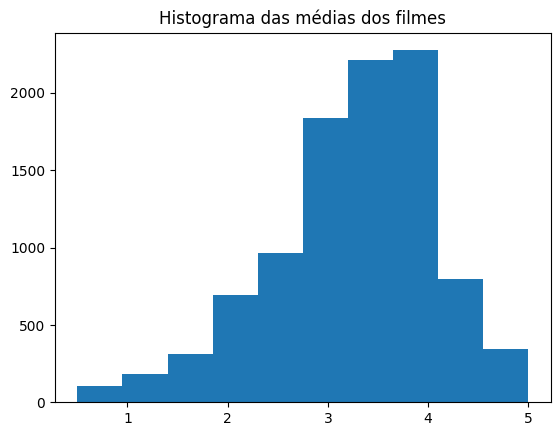

<Figure size 1200x600 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt

plt.hist(medias_por_filme)
plt.title("Histograma das médias dos filmes")
plt.figure(figsize=(12,6))

In [21]:
tmdb = pd.read_csv('./tmdb_5000_movies.csv', sep=',')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


Cada coluna possui um tipo de dado neste DataFrame. 

Exemplos desses 

## Tipos de dados

- Categórica nominal: Onde não se há uma hierarquia entre os itens da lista, apenas o nome

In [22]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

- Variável categórica ordinal: Onde se há uma uma ordem nas categorias

Neste caso teria como exemplo:

    1º grau
    2º grau
    3º grau

Onde se há uma ordem entre eles, mas que continuam sendo categorias

- Variável quantitativa discreta: onde não existe decimal, ou quando possui um intervalo definido, como de 1 em 1 ou de meio em meio

In [23]:
tmdb.vote_count

0       11800
1        4500
2        4466
3        9106
4        2124
        ...  
4798      238
4799        5
4800        6
4801        7
4802       16
Name: vote_count, Length: 4803, dtype: int64

- Variável quantitativa contínua: onde a variável não possui um intervalo determinado possível

In [24]:
tmdb.vote_average

0       7.2
1       6.9
2       6.3
3       7.6
4       6.1
       ... 
4798    6.6
4799    5.9
4800    7.0
4801    5.7
4802    6.3
Name: vote_average, Length: 4803, dtype: float64

In [25]:
tmdb.original_language.value_counts()

original_language
en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: count, dtype: int64

In [26]:
contagem_de_lingua = tmdb.original_language.value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ['original_language', 'total']
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


Um boa forma de visualizar esse tipo de dados é utilizando os 

__plots de categoria do seaborn__: https://seaborn.pydata.org/tutorial/categorical.html

<AxesSubplot: xlabel='original_language', ylabel='total'>

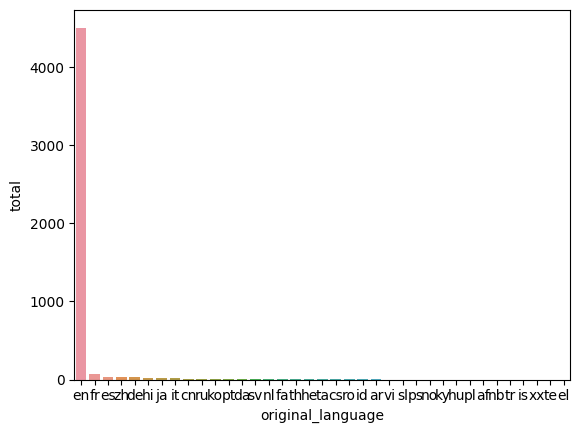

In [27]:
sns.barplot(data=contagem_de_lingua, x = "original_language", y = "total")

Uma forma de fazer um plot mais alto nível, sem usar value_counts, resetar índices, é utilizando o catplot

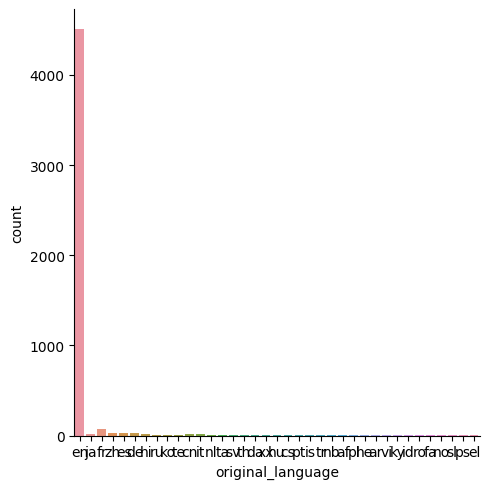

In [28]:
sns.catplot(kind="count", x = "original_language", data = tmdb )

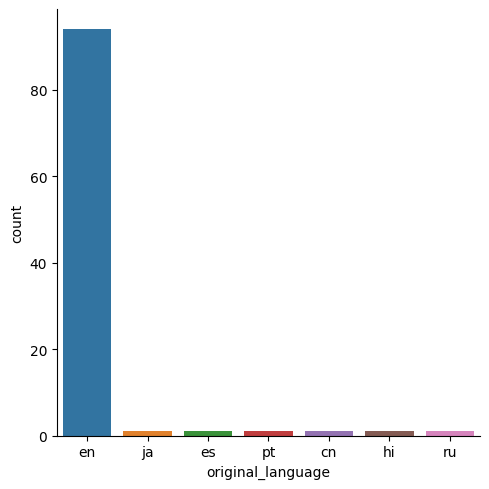

In [29]:
sns.catplot(kind="count", x = "original_language", data = tmdb.sample(n=100, random_state=101))

A visualização desse gráfico não fala muita coisa. Apenas que existem muitos filmes em inglês. É preciso utilizar mais fundamentos de __data visualization__ para melhorar conseguir obter mais informação

([<matplotlib.patches.Wedge at 0x1f5bc079570>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text(

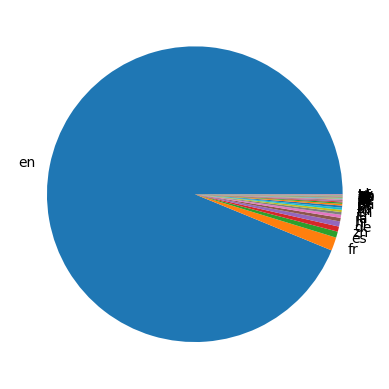

In [30]:
# Antes de melhorar, um exemplo de gráfico com péssima visualização
plt.pie(x = contagem_de_lingua["total"], labels=contagem_de_lingua["original_language"])

É preciso entender que ao se explorar os dados, visualizações erradas vão acontecer. O primeiro passo para análise de dados é explorar os dados. Depois, se busca entendê-los e por último, apresentá-los.

Como se viu que o inglês é a língua que mais está presente, pode-se mudar apresentação para mostrar qual a relação da lingua "inglês" com todas as outras. Para isso, é preciso:

- criar as variáveis
- criar novo dataframe
- plotar o gráfico com base no novo daframe

In [31]:
total_ingles = contagem_de_lingua.iloc[0]['total']
total_geral = contagem_de_lingua.total.sum()
total_resto = total_geral - total_ingles

<AxesSubplot: xlabel='lingua', ylabel='total'>

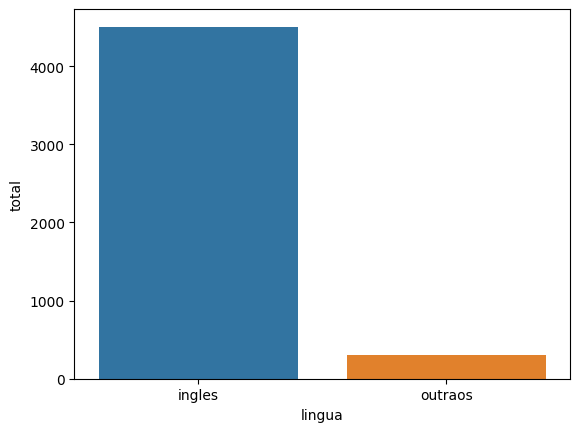

In [32]:
dados = {
    'lingua': ['ingles', 'outraos'],
    'total': [total_ingles, total_resto]
}

dados = pd.DataFrame(dados)
sns.barplot(data = dados, x = 'lingua', y = 'total')

([<matplotlib.patches.Wedge at 0x1f5bc1b38e0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outraos')])

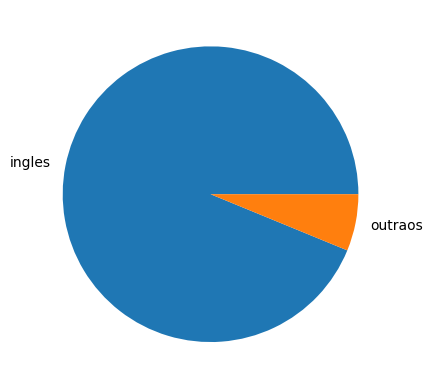

In [33]:
# Ainda que a informação esteja tratada, o gráfico não diz tanto quanto um gráfico de barras
plt.pie(dados["total"], labels = dados["lingua"])

Buscando mais informaçoes, é possível ainda criar outra visualização dos dados presentes em "outros"

<AxesSubplot: xlabel='original_language'>

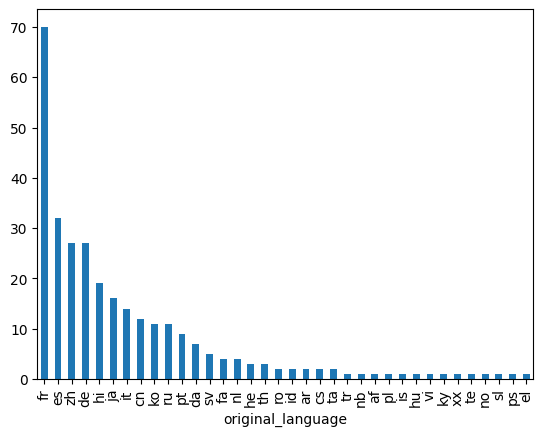

In [34]:
# minha versão antes do professor
tmdb[tmdb.original_language != 'en'].original_language.value_counts().plot(kind='bar')


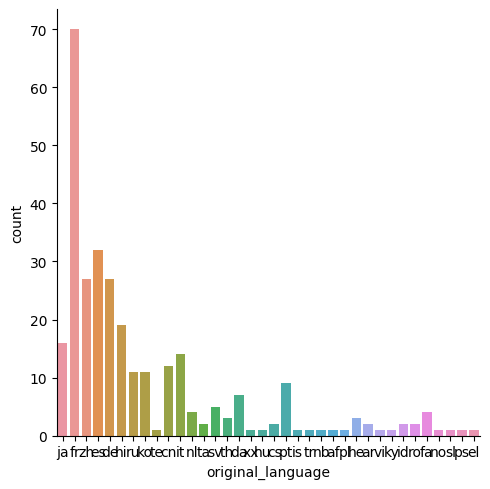

In [35]:
filmes_com_lingua_oficial_diferente_ingles = tmdb[tmdb.original_language != 'en']
sns.catplot(x="original_language", kind='count', data=filmes_com_lingua_oficial_diferente_ingles)

É preciso melhorar algumas coisas nesse gráfico:
- espacaçamento entre linguas

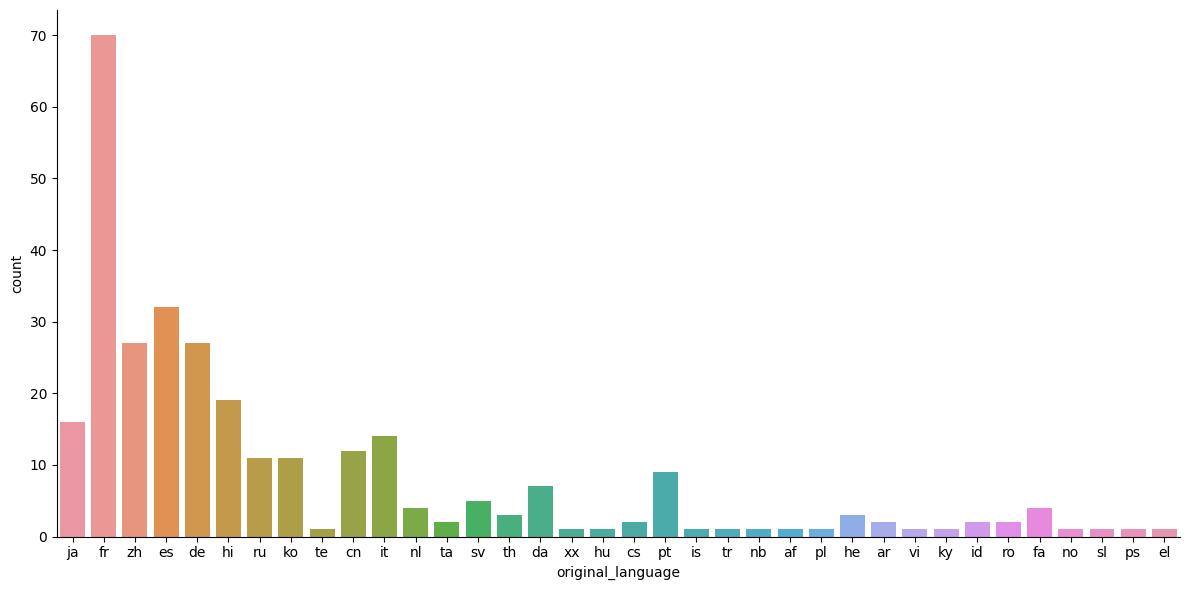

In [36]:
sns.catplot(x="original_language", kind='count', data=filmes_com_lingua_oficial_diferente_ingles,
            height=6, aspect=2)

É preciso melhorar algumas coisas nesse gráfico:
- espacaçamento entre linguas
- ordenar do maior pro menor

In [37]:
contagem_de_lingua

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27
5,hi,19
6,ja,16
7,it,14
8,cn,12
9,ru,11


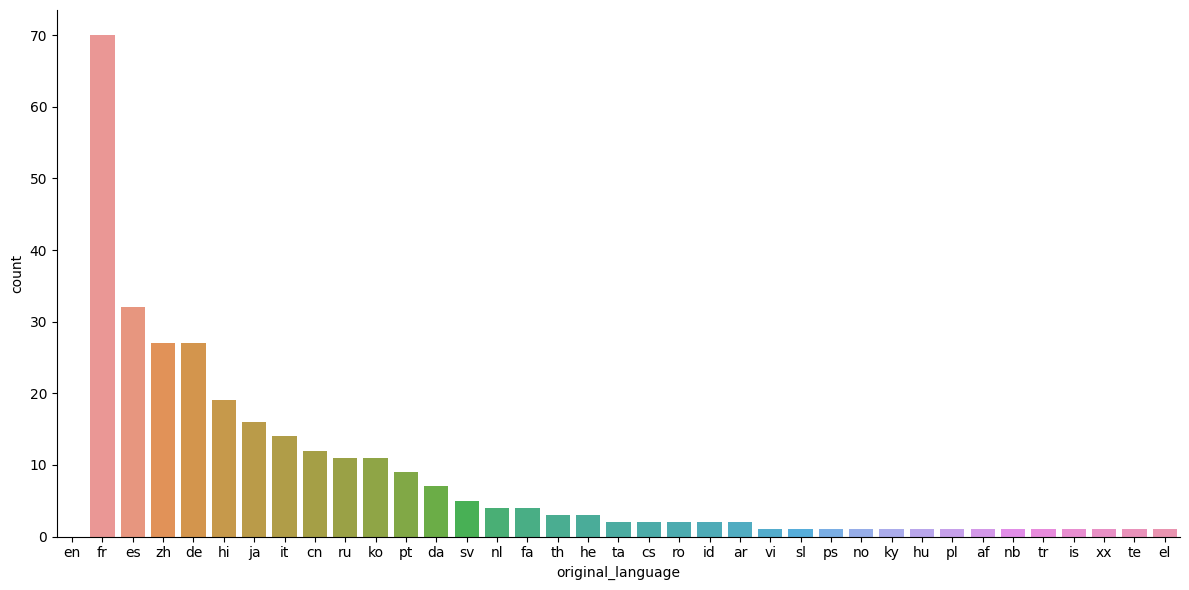

In [38]:
sns.catplot(x="original_language", kind='count', data=filmes_com_lingua_oficial_diferente_ingles, 
            height=6, aspect=2,
            order=contagem_de_lingua.original_language)

É preciso melhorar algumas coisas nesse gráfico:
- espacaçamento entre linguas
- ordenar do maior pro menor
- mudar a paleta de cores

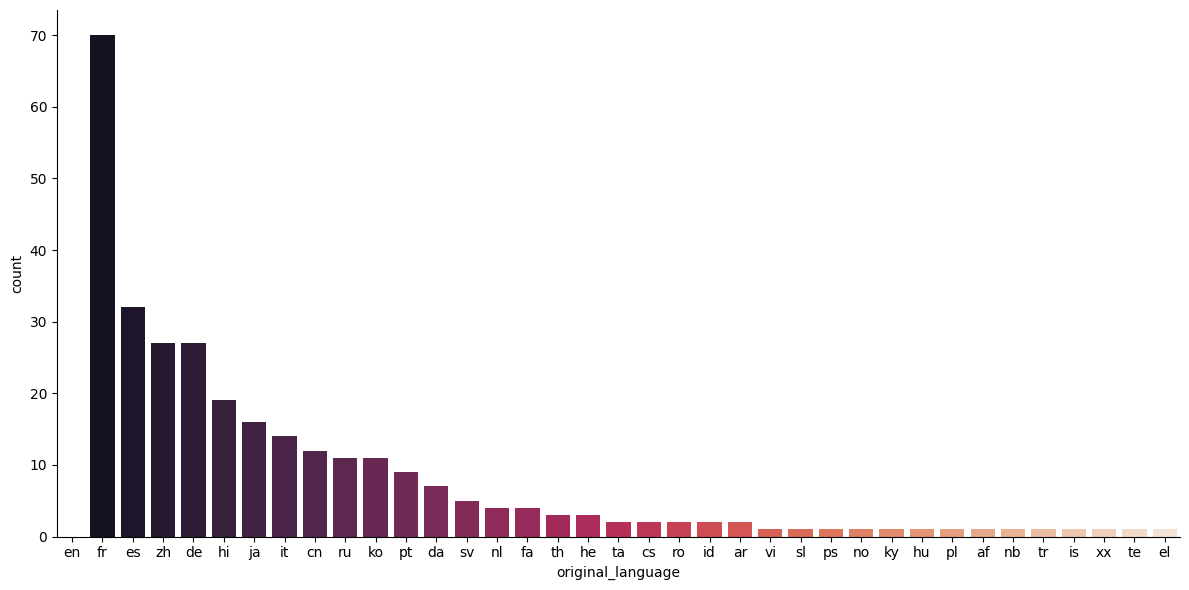

In [39]:
sns.catplot(x="original_language", kind='count', data=filmes_com_lingua_oficial_diferente_ingles, 
            height=6, aspect=2, 
            order=contagem_de_lingua.original_language,
            palette="rocket")

Agora, busca-se analisar dois filmes. Como estão o comportamento das suas notas.

In [40]:
filmes.head(2)

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [41]:
notas.head(2)

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247


In [42]:
notas_toy_story = notas[notas.filmeId == 1]
notas_jumanji = notas[notas.filmeId == 2]

- Verificando a média

In [43]:
print("A nota média de Toy Story é: %.2f" % notas_toy_story.nota.mean())
print("A nota média de Jumanji é: %.2f" % notas_jumanji.nota.mean())

A nota média de Toy Story é: 3.92
A nota média de Jumanji é: 3.43


- Verificando a mediana

In [44]:
print("A mediana das notas de Toy Story é: %.2f" % notas_toy_story.nota.median())
print("A mediana das notas de de Jumanji é: %.2f" % notas_jumanji.nota.median())

A mediana das notas de Toy Story é: 4.00
A mediana das notas de de Jumanji é: 3.50


__Medidas de tendência central__, como a __média__ e a __mediana__ não nos contam a história dos dados. Não fala como o dado estão se comportando. Apenas resumem todo o comportamento a um valor central.

É preciso ver como os dados se comportam, para entendê-los.

Aliar às medidas de tendência central, parâmetros que meçam o desvio dos dados é interessante para melhorar o entendimento do dado

In [45]:
print("O desvio padrão das notas de Toy Story é: %.2f" % notas_toy_story.nota.std())
print("O desvio padrão das notas de de Jumanji é: %.2f" % notas_jumanji.nota.std())

O desvio padrão das notas de Toy Story é: 0.83
O desvio padrão das notas de de Jumanji é: 0.88


Ainda auxiliando no entendimento dos dados, o gráficos auxiliam.

Boxplot ou Histogramas são boas formas de entender como o conjunto de dados se comportam

{'whiskers': [<matplotlib.lines.Line2D at 0x1f5bce1e2c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f5bce1e800>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f5bce1e020>,
 'medians': [<matplotlib.lines.Line2D at 0x1f5bce1ed40>,
 'fliers': [<matplotlib.lines.Line2D at 0x1f5bce1efe0>,
 'means': []}

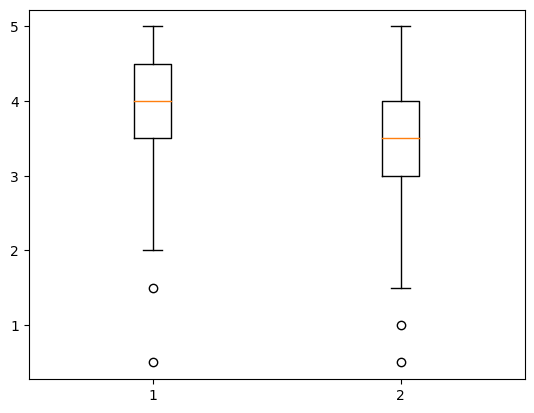

In [46]:
plt.boxplot([notas_toy_story.nota, notas_jumanji.nota])

<AxesSubplot: xlabel='filmeId', ylabel='nota'>

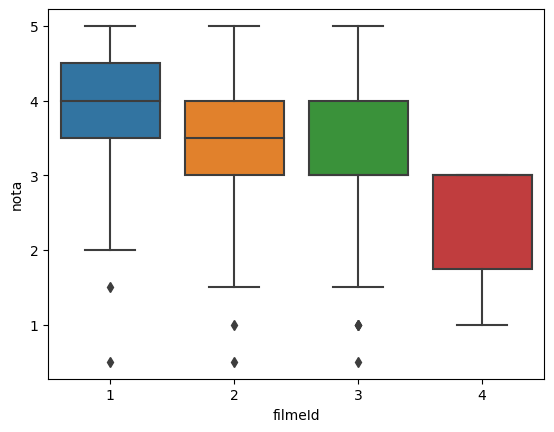

In [47]:
sns.boxplot(data = notas[notas.filmeId.isin(list(range(1, 5)))], 
            x = "filmeId", 
            y = "nota")

<AxesSubplot: >

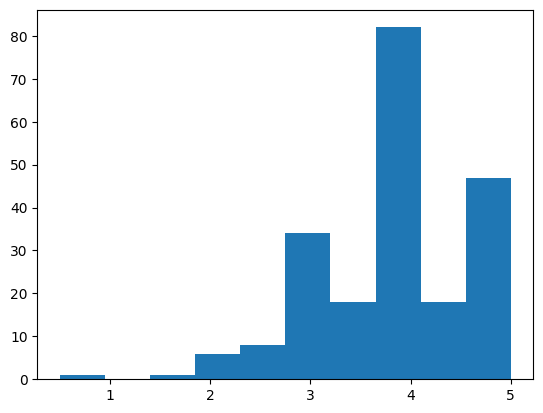

In [48]:
notas_toy_story.nota.hist(grid=False)

<AxesSubplot: >

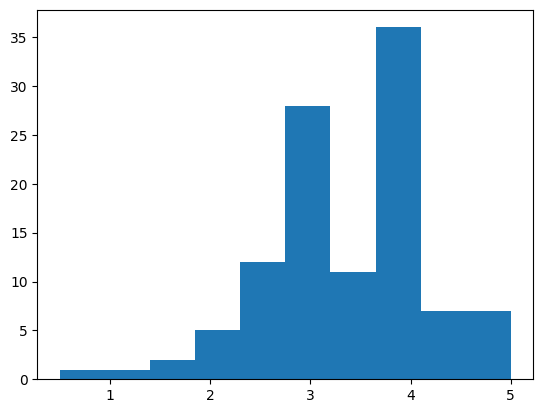

In [49]:
notas_jumanji.nota.hist(grid=False)